# 6.6 Lab 2: Ridge Regression and the Lasso

In [80]:
import pandas as pd
import numpy as np

from sklearn.linear_model import Ridge,Lasso
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.preprocessing import StandardScaler

import matplotlib.pyplot as plt
import seaborn as sns

from itertools import combinations

In [7]:
data = pd.read_csv(r'E:\programming\dataset\Into_to_statstical_learning\Hitters.csv')
print(data.shape)
data.head()

(322, 21)


,Unnamed: 0,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,...,CRuns,CRBI,CWalks,League,Division,PutOuts,Assists,Errors,Salary,NewLeague
0,-Andy Allanson,293,66,1,30,29,14,1,293,66,...,30,29,14,A,E,446,33,20,NaN,A
1,-Alan Ashby,315,81,7,24,38,39,14,3449,835,...,321,414,375,N,W,632,43,10,475.0,N
2,-Alvin Davis,479,130,18,66,72,76,3,1624,457,...,224,266,263,A,W,880,82,14,480.0,A
3,-Andre Dawson,496,141,20,65,78,37,11,5628,1575,...,828,838,354,N,E,200,11,3,500.0,N
4,-Andres Galarraga,321,87,10,39,42,30,2,396,101,...,48,46,33,N,E,805,40,4,91.5,N


In [9]:
[col for col in data.columns if data[col].isnull().sum()>0]

['Salary']

In [12]:
# ONly Salarty has missing values
data.dropna(inplace = True)
# also we don;t need the name col
data.drop('Unnamed: 0',axis = 1,inplace = True)

In [13]:
# In R, the qualitative variables are automatically converted into dummy variables, but here, we have to do it manually.
qual_vars = [col for col in data.columns if data[col].dtype == 'O']
print(qual_vars)

['League', 'Division', 'NewLeague']


In [14]:
data = pd.get_dummies(data,columns= qual_vars,drop_first=True)
data.head()

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,PutOuts,Assists,Errors,Salary,League_N,Division_W,NewLeague_N
1,315,81,7,24,38,39,14,3449,835,69,321,414,375,632,43,10,475.0,1,1,1
2,479,130,18,66,72,76,3,1624,457,63,224,266,263,880,82,14,480.0,0,1,0
3,496,141,20,65,78,37,11,5628,1575,225,828,838,354,200,11,3,500.0,1,0,1
4,321,87,10,39,42,30,2,396,101,12,48,46,33,805,40,4,91.5,1,0,1
5,594,169,4,74,51,35,11,4408,1133,19,501,336,194,282,421,25,750.0,0,1,0


# 6.6.1 Ridge Regression

In [15]:
list_alpha = 10**np.linspace(-2,10,100)

In [18]:
# in R, by default, the predictors are standardized
X = data.drop('Salary',axis = 1)
y = data['Salary']
scaler = StandardScaler()
X = scaler.fit_transform(X)
# Now, X is standardised

In [25]:
coeff_matrix = {}

for alpha in list_alpha:
    model = Ridge(alpha=alpha)
    model.fit(X,y)
    coeff_matrix[alpha] = list(model.coef_)

In [56]:
tmp = pd.DataFrame(coeff_matrix).T
tmp.index = list_alpha
tmp

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
1.000000e-02,-290.918728,337.229910,37.495419,-60.017790,-26.665375,134.928045,-17.051824,-388.777849,88.580588,-12.898994,477.601029,258.387712,-213.378990,78.761482,5.365672e+01,-2.219265e+01,3.125460e+01,-58.443824,-1.238497e+01
1.321941e-02,-290.862746,337.039648,37.381713,-59.842092,-26.560787,134.881689,-17.166596,-388.046721,89.164057,-12.494991,476.606154,257.661560,-213.216987,78.761568,5.363224e+01,-2.220266e+01,3.125631e+01,-58.453308,-1.239630e+01
1.747528e-02,-290.789150,336.790313,37.232619,-59.611894,-26.423634,134.820836,-17.317830,-387.078202,89.916997,-11.967363,475.303911,256.712435,-213.005133,78.761698,5.359983e+01,-2.221573e+01,3.125844e+01,-58.465774,-1.241105e+01
2.310130e-02,-290.692507,336.464367,37.037600,-59.311089,-26.244216,134.741106,-17.516885,-385.794898,90.881489,-11.280807,473.604369,255.476124,-212.728953,78.761896,5.355691e+01,-2.223273e+01,3.126106e+01,-58.482132,-1.243018e+01
3.053856e-02,-290.565733,336.039547,36.783312,-58.919331,-26.010245,134.636895,-17.778470,-384.094384,92.105310,-10.391640,471.394628,253.872789,-212.370325,78.762198,5.350006e+01,-2.225474e+01,3.126419e+01,-58.503548,-1.245482e+01
4.037017e-02,-290.399549,335.487850,36.453059,-58.411247,-25.706350,134.501078,-18.121489,-381.841703,93.639509,-9.246911,468.535060,251.805034,-211.906865,78.762654,5.342477e+01,-2.228310e+01,3.126778e+01,-58.531507,-1.248636e+01
5.336699e-02,-290.181690,334.774358,36.026278,-57.755665,-25.313619,134.324660,-18.569948,-378.860463,95.533628,-7.784143,464.856173,249.156954,-211.311366,78.763326,5.332509e+01,-2.231937e+01,3.127166e+01,-58.567872,-1.252635e+01
7.054802e-02,-289.895649,333.855863,35.478148,-56.914983,-24.809266,134.096355,-19.153838,-374.923186,97.827905,-5.932221,460.156947,245.795044,-210.551308,78.764286,5.319331e+01,-2.236540e+01,3.127547e+01,-58.614953,-1.257650e+01
9.326033e-02,-289.518653,332.679118,34.779442,-55.844782,-24.166567,133.802055,-19.909742,-369.742688,100.542373,-3.614040,454.205686,241.572143,-209.588450,78.765577,5.301946e+01,-2.242329e+01,3.127854e+01,-58.675559,-1.263858e+01
1.232847e-01,-289.018305,331.178403,33.896817,-54.493832,-23.355272,133.424139,-20.880776,-362.967886,103.663876,-0.751650,446.744615,236.335737,-208.378380,78.767153,5.279100e+01,-2.249534e+01,3.127980e+01,-58.753015,-1.271421e+01


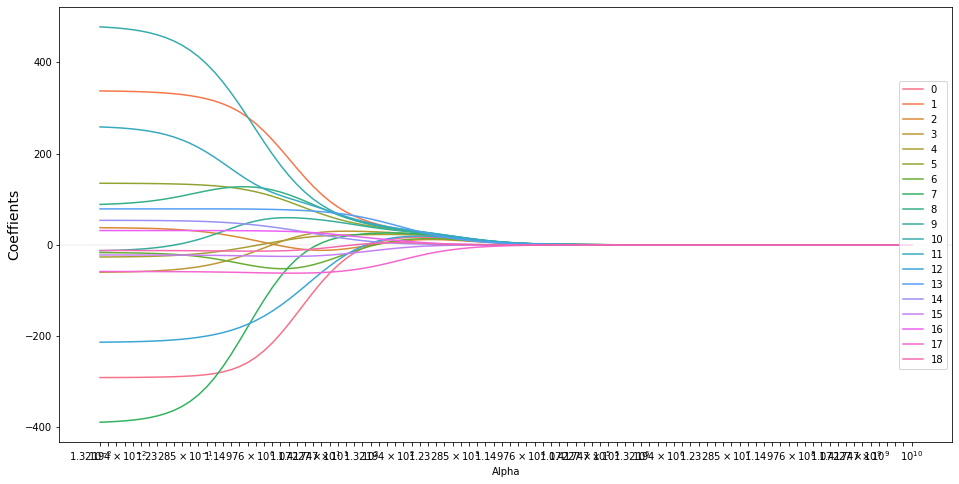

In [66]:
plt.figure(figsize = (16,8))
sns.lineplot(data = tmp, dashes=False)
plt.axhline(y = 0,linestyle = 'dashed',lw = 0.1,color = 'black')
plt.xscale('log')
plt.xticks(list_alpha)
plt.ylabel('Coeffients',fontsize = 14)
plt.xlabel('Alpha')
plt.legend(loc='right')

In [26]:
#for a small value of aplpha, the coeff are - 
print(coeff_matrix[list_alpha[8]])

[-289.51865327021113, 332.6791184234042, 34.77944193671503, -55.844782296334756, -24.166567449872517, 133.80205477153837, -19.909741728278064, -369.7426875016239, 100.54237339879005, -3.614039922956993, 454.20568566002515, 241.57214343743996, -209.58845049883323, 78.76557723286047, 53.019463960954646, -22.42328507878067, 31.278539444236767, -58.67555869272185, -12.638577929628404]


In [27]:
# for a large value of alpha, the coeff are - 
print(coeff_matrix[list_alpha[90]])

[5.763318248704299e-05, 6.40427770922997e-05, 5.007915350288837e-05, 6.129576852892076e-05, 6.561689194262847e-05, 6.480083916119168e-05, 5.8492473598104705e-05, 7.681124525639192e-05, 8.013609785207736e-05, 7.663536669557501e-05, 8.214613025072637e-05, 8.277213810215088e-05, 7.150981326993902e-05, 4.386760495701925e-05, 3.7134612262225823e-06, -7.884609239667503e-07, -2.085002265335332e-06, -2.8105497481995366e-05, -4.1378878558149674e-07]


In [28]:
# we can see that for large values for lambda the ceoff are very very small, although none is equal to 0.

In [31]:
list_l2_norm = []
for alpha in list_alpha:
    list_l2_norm.append(np.linalg.norm(coeff_matrix[alpha]))

(0, 100)

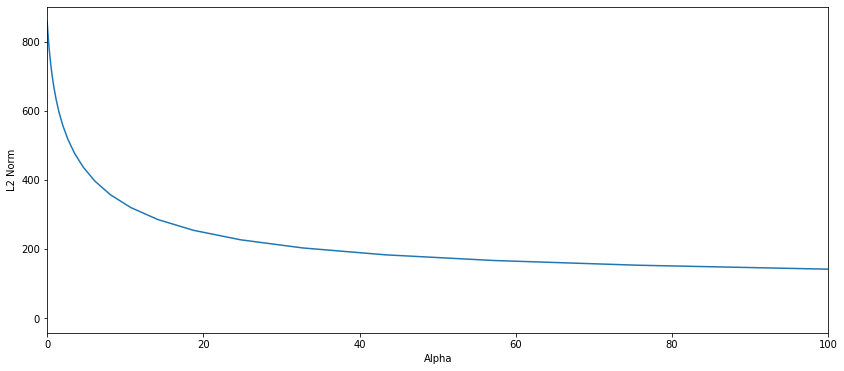

In [37]:
plt.figure(figsize = (14,6))
plt.plot(list_alpha,list_l2_norm)
plt.xlabel('Alpha')
plt.ylabel('L2 Norm')
plt.xlim(0,100)

In [38]:
# this is the relationship between, l2 norm, and alpha, We can see that as X increases, l2 norm decreases. Which means 
# the size of the coefficients are decreasing

### Selecting the best value of alpha

In [39]:
# Using validation approach
X_train,X_test,y_train,y_test = train_test_split(data.drop('Salary',axis = 1),data['Salary'],test_size = 0.3,random_state = 1)

In [40]:
validation_score = []
for alpha in list_alpha:
    model = Ridge(alpha=alpha)
    model.fit(X_train,y_train)
    validation_score.append(mean_squared_error(model.predict(X_test),y_test)*len(y_test))

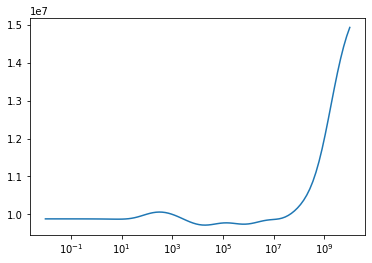

In [48]:
sns.lineplot(list_alpha,validation_score)
plt.xscale('log')

In [47]:
np.argmin(validation_score)

52

## Lasso

In [68]:
list_alpha = 10**np.linspace(-2,10,100)

In [69]:
# in R, by default, the predictors are standardized
X = data.drop('Salary',axis = 1)
y = data['Salary']
scaler = StandardScaler()
X = scaler.fit_transform(X)
# Now, X is standardised

In [70]:
coeff_matrix = {}

for alpha in list_alpha:
    model = Lasso(alpha=alpha)
    model.fit(X,y)
    coeff_matrix[alpha] = list(model.coef_)

C:\Users\Lenovo\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 9181735.8181662, tolerance: 5331.911278864535
  positive)
C:\Users\Lenovo\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 8172423.332844813, tolerance: 5331.911278864535
  positive)
C:\Users\Lenovo\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 6793694.605692047, tolerance: 5331.911278864535
  positive)
C:\Users\Lenovo\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap

In [72]:
tmp = pd.DataFrame(coeff_matrix).T
tmp.index = list_alpha
tmp.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
0.010000,-286.905007,331.363096,36.212359,-57.357808,-25.658648,133.787447,-14.313048,-422.215279,133.673334,-4.578178,464.460502,246.073678,-208.802960,78.639945,54.350452,-22.467425,31.583507,-58.365877,-12.672573
0.013219,-286.950122,331.325695,36.091031,-57.257930,-25.528647,133.747959,-14.398744,-420.990800,132.935083,-4.435307,464.206011,245.764342,-208.778380,78.644615,54.304079,-22.452758,31.554027,-58.363511,-12.643337
0.017475,-287.009869,331.275922,35.930298,-57.125588,-25.356432,133.695761,-14.512163,-419.372611,131.963418,-4.244520,463.867405,245.352140,-208.745736,78.650806,54.242814,-22.433398,31.515092,-58.360387,-12.604741
0.023101,-287.089063,331.210178,35.717682,-56.950581,-25.128615,133.626802,-14.662262,-417.232465,130.679408,-3.991625,463.419197,244.805989,-208.702686,78.659004,54.161818,-22.407810,31.463628,-58.356260,-12.553732
0.030539,-287.193575,331.122512,35.436185,-56.718727,-24.827025,133.535567,-14.860641,-414.406159,128.989613,-3.654757,462.823461,244.079779,-208.645293,78.669850,54.054836,-22.374038,31.395662,-58.350806,-12.486383


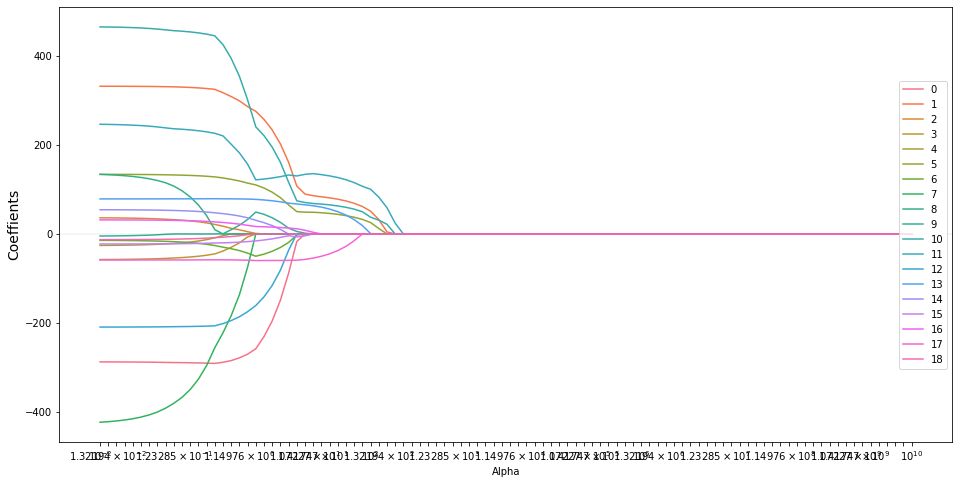

In [73]:
plt.figure(figsize = (16,8))
sns.lineplot(data = tmp, dashes=False)
plt.axhline(y = 0,linestyle = 'dashed',lw = 0.1,color = 'black')
plt.xscale('log')
plt.xticks(list_alpha)
plt.ylabel('Coeffients',fontsize = 14)
plt.xlabel('Alpha')
plt.legend(loc='right')

In [74]:
#for a small value of aplpha, the coeff are - 
print(coeff_matrix[list_alpha[8]])

[-288.06252906937357, 330.36981199887236, 33.06222643992329, -54.759037031179474, -22.28462955849103, 132.76311903093205, -16.525200498348568, -390.65923055726455, 114.82688141722235, -0.8084173075287386, 457.78148356074774, 237.9513654668813, -208.14987606522428, 78.76080852606059, 53.154287842464484, -22.089840987641004, 30.823239242660694, -58.30463802012528, -11.91895965736159]


In [75]:
# for a large value of alpha, the coeff are - 
print(coeff_matrix[list_alpha[90]])

[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, -0.0, -0.0, -0.0, -0.0]


In [76]:
# we can see that for large values for lambda the ceoff are exactly zero, we can compare this with what we got from ridge.

In [77]:
list_l2_norm = []
for alpha in list_alpha:
    list_l2_norm.append(np.linalg.norm(coeff_matrix[alpha]))

(0, 100)

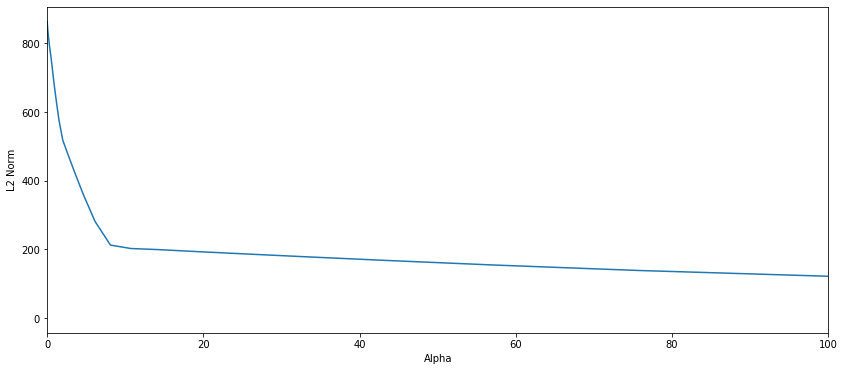

In [78]:
plt.figure(figsize = (14,6))
plt.plot(list_alpha,list_l2_norm)
plt.xlabel('Alpha')
plt.ylabel('L2 Norm')
plt.xlim(0,100)

In [79]:
# this is the relationship between, l2 norm, and alpha, We can see that as X increases, l2 norm decreases. Which means 
# the size of the coefficients are decreasing, but the decrease is not that smooth as it was in the case of Ridge regression

## Selecting the best value of alpha, this time using cross validation

In [84]:
parameters = {'alpha':list_alpha}
lasso = Lasso()
model = GridSearchCV(lasso,parameters)
model.fit(data.drop('Salary',axis = 1),data['Salary'])

C:\Users\Lenovo\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
C:\Users\Lenovo\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 8025027.105797453, tolerance: 3171.3378160881116
  positive)
C:\Users\Lenovo\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 7668131.081031161, tolerance: 3539.318352553054
  positive)
C:\Users\Lenovo\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 7379689

C:\Users\Lenovo\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 7670825.515276744, tolerance: 3539.318352553054
  positive)
C:\Users\Lenovo\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 7312413.720431845, tolerance: 3943.165545639786
  positive)
C:\Users\Lenovo\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 7986134.331875311, tolerance: 3171.3378160881116
  positive)
C:\Users\Lenovo\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality 

C:\Users\Lenovo\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5858873.514318958, tolerance: 3539.318352553054
  positive)
C:\Users\Lenovo\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 107469.68847487494, tolerance: 3943.165545639786
  positive)
C:\Users\Lenovo\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3290584.1002781773, tolerance: 3171.3378160881116
  positive)
C:\Users\Lenovo\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Dualit

GridSearchCV(cv='warn', error_score='raise-deprecating',
             estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=1000, normalize=False, positive=False,
                             precompute=False, random_state=None,
                             selection='cyclic', tol=0.0001, warm_start=False),
             iid='warn', n_jobs=None,
             param_grid={'alpha': array([1.00000000e-02, 1.32194115e-02, 1.74752840e-02, 2.31012970e-02,...
       4.97702356e+07, 6.57933225e+07, 8.69749003e+07, 1.14975700e+08,
       1.51991108e+08, 2.00923300e+08, 2.65608778e+08, 3.51119173e+08,
       4.64158883e+08, 6.13590727e+08, 8.11130831e+08, 1.07226722e+09,
       1.41747416e+09, 1.87381742e+09, 2.47707636e+09, 3.27454916e+09,
       4.32876128e+09, 5.72236766e+09, 7.56463328e+09, 1.00000000e+10])},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [89]:
best_model = model.best_estimator_
best_model
# value of alpha is 174.75

Lasso(alpha=174.7528400007683, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [88]:
# this is the model that is choosen
best_model.coef_

array([-1.39313334,  5.00607536,  0.        ,  0.        ,  0.        ,
        4.11310808, -0.        , -0.24893363,  0.43432675,  0.        ,
        1.19379874,  0.72902921, -0.49482578,  0.28710204,  0.24005195,
       -0.        ,  0.        , -0.        ,  0.        ])

In [91]:
# We can see that only 10 coeffficients are having non zero weights. 

In [95]:
pd.DataFrame({'Coefficients':list(best_model.coef_)},index = list(data.drop('Salary',axis = 1).columns))

,Coefficients
AtBat,-1.393133
Hits,5.006075
HmRun,0.000000
Runs,0.000000
RBI,0.000000
Walks,4.113108
Years,-0.000000
CAtBat,-0.248934
CHits,0.434327
CHmRun,0.000000
